In [ ]:
!unzip /content/drive/MyDrive/photos.zip

Streaming output truncated to the last 5000 lines.
 extracting: images/validation/fear/9040.jpg  
 extracting: images/validation/fear/9101.jpg  
 extracting: images/validation/fear/911.jpg  
 extracting: images/validation/fear/9179.jpg  
 extracting: images/validation/fear/9205.jpg  
 extracting: images/validation/fear/9232.jpg  
 extracting: images/validation/fear/9251.jpg  
 extracting: images/validation/fear/9261.jpg  
 extracting: images/validation/fear/9281.jpg  
 extracting: images/validation/fear/9302.jpg  
 extracting: images/validation/fear/9333.jpg  
 extracting: images/validation/fear/9369.jpg  
 extracting: images/validation/fear/9370.jpg  
 extracting: images/validation/fear/9474.jpg  
 extracting: images/validation/fear/949.jpg  
 extracting: images/validation/fear/9602.jpg  
 extracting: images/validation/fear/9606.jpg  
 extracting: images/validation/fear/9842.jpg  
 extracting: images/validation/fear/9898.jpg  
   creating: images/validation/happy/
 extracting: images/

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Model, Sequential
import os

## Checking the access to the images

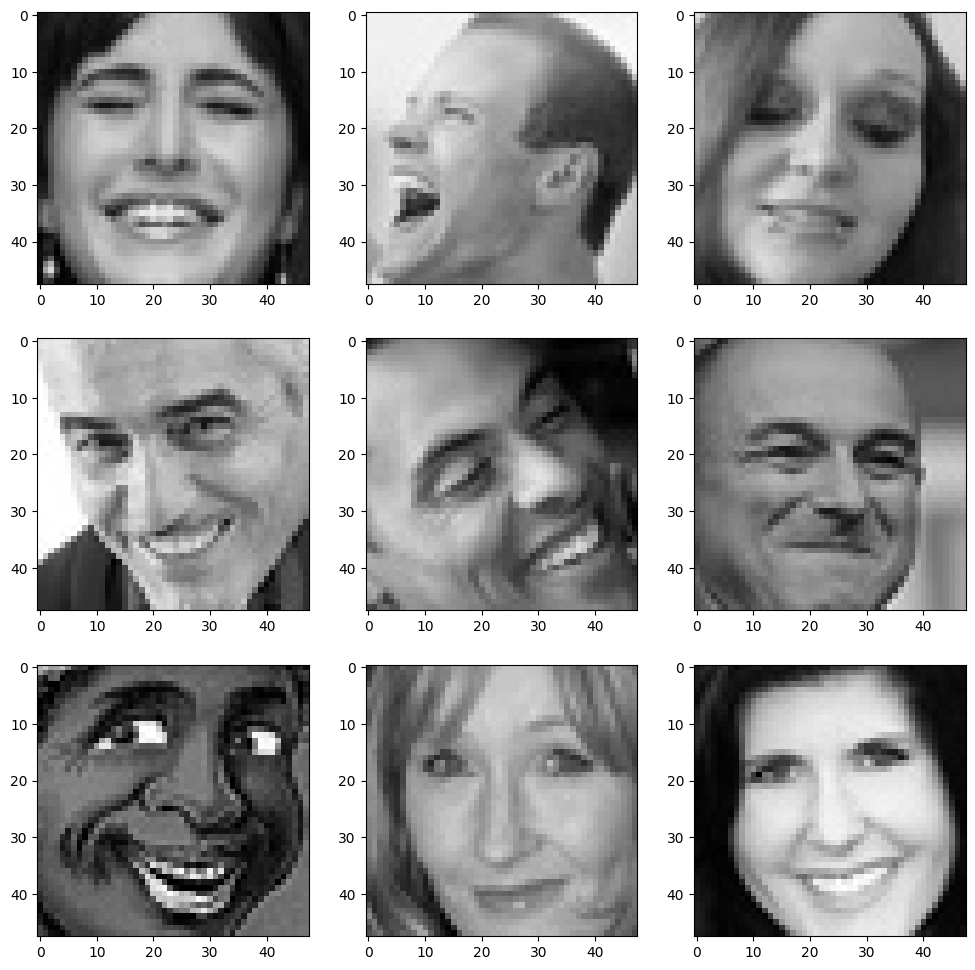

In [ ]:
folder_path = "/content/images/"
name = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+name+"/"+
                  os.listdir(folder_path + "train/" + name)[i], target_size=(48, 48))
    plt.imshow(img)
plt.show()

In [ ]:
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
batch_size=128
#shuffle is default true, we make it false for the testdata:
trainData = datagen_train.flow_from_directory(folder_path+"train",target_size = (50,50),color_mode = "grayscale",batch_size=batch_size,class_mode='categorical')
testData = datagen_val.flow_from_directory(folder_path+"validation",target_size = (50,50),color_mode = "grayscale",batch_size=batch_size,class_mode='categorical',shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
import numpy as np
trainLabels = np.array(trainData.labels)
testLabels = np.array(testData.labels)

In [ ]:
#total classes or categories=7
nc=7
model=Sequential()
model.add(Conv2D(64, (3, 3), padding='same',activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r = model.fit(trainData,epochs=10,validation_data=testData)

Epoch 1/10
226/226 [==============================] - 407s 2s/step - loss: 1.9645 - accuracy: 0.3447 - val_loss: 1.5021 - val_accuracy: 0.4206
Epoch 2/10
226/226 [==============================] - 401s 2s/step - loss: 1.4065 - accuracy: 0.4538 - val_loss: 1.4269 - val_accuracy: 0.4516
Epoch 3/10
226/226 [==============================] - 399s 2s/step - loss: 1.2843 - accuracy: 0.5062 - val_loss: 1.4570 - val_accuracy: 0.4430
Epoch 4/10
226/226 [==============================] - 399s 2s/step - loss: 1.1851 - accuracy: 0.5494 - val_loss: 1.3048 - val_accuracy: 0.5078
Epoch 5/10
226/226 [==============================] - 399s 2s/step - loss: 1.0918 - accuracy: 0.5856 - val_loss: 1.3475 - val_accuracy: 0.5023
Epoch 6/10
226/226 [==============================] - 398s 2s/step - loss: 1.0012 - accuracy: 0.6219 - val_loss: 1.3653 - val_accuracy: 0.5092
Epoch 7/10
226/226 [==============================] - 397s 2s/step - loss: 0.9072 - accuracy: 0.6608 - val_loss: 1.5026 - val_accuracy: 0.4846

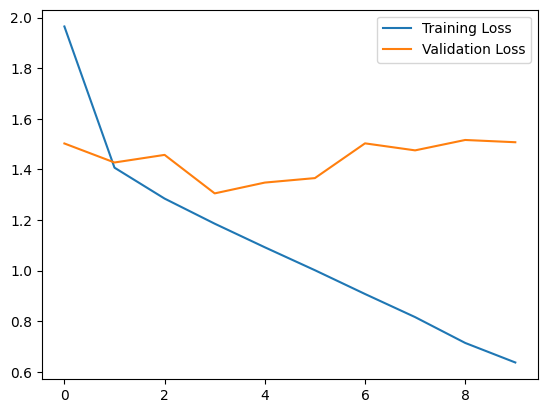

In [ ]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

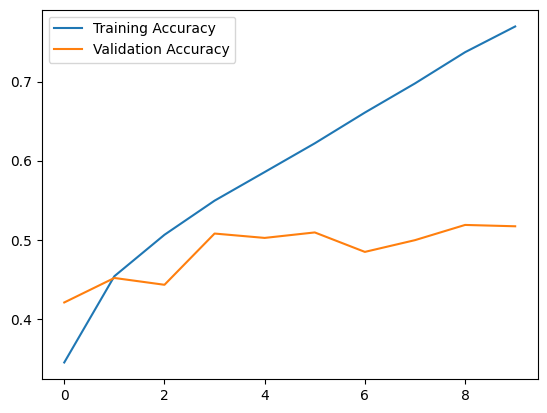

In [ ]:
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

In [ ]:
tlos, tacc = model.evaluate(testData)
print("Test loss: ", tlos)
print("Test accuracy: ", tacc)

56/56 [==============================] - 25s 441ms/step - loss: 1.5070 - accuracy: 0.5170
Test loss:  1.5070044994354248
Test accuracy:  0.5169827342033386


In [ ]:
labels=['surprise', 'sad', 'neutral','happy','fear','disgust','angry']

In [ ]:
import tensorflow as tf
image = tf.io.read_file('/content/drive/MyDrive/9935.jpg')
# Preprocess the image
image = tf.image.decode_jpeg(image)
image = tf.image.resize(image, (48, 48))
image=np.expand_dims(image,0)
image.shape

(1, 48, 48, 1)

In [ ]:
# Make a prediction on the image
prediction = model.predict(image)
# Get the class with the highest probability
class_index = np.argmax(prediction)
# Print the class with the highest probability
print('Predicted class:', labels[class_index])

1/1 [==============================] - 0s 213ms/step
Predicted class: happy


Misclassifications:

In [ ]:
image = tf.io.read_file('/content/drive/MyDrive/9747.jpg')
# Preprocess the image
image = tf.image.decode_jpeg(image)
image = tf.image.resize(image, (48, 48))
image=np.expand_dims(image,0)
# Make a prediction on the image
prediction = model.predict(image)
# Get the class with the highest probability
class_index = np.argmax(prediction)
# Print the class with the highest probability
print('Predicted class:', labels[class_index])

1/1 [==============================] - 0s 25ms/step
Predicted class: disgust


In [ ]:
image = tf.io.read_file('/content/drive/MyDrive/9908.jpg')
# Preprocess the image
image = tf.image.decode_jpeg(image)
image = tf.image.resize(image, (48, 48))
image=np.expand_dims(image,0)
# Make a prediction on the image
prediction = model.predict(image)
# Get the class with the highest probability
class_index = np.argmax(prediction)
# Print the class with the highest probability
print('Predicted class:', labels[class_index])

1/1 [==============================] - 0s 23ms/step
Predicted class: angry


1/1 [==============================] - 0s 50ms/step
Predicted class: angry


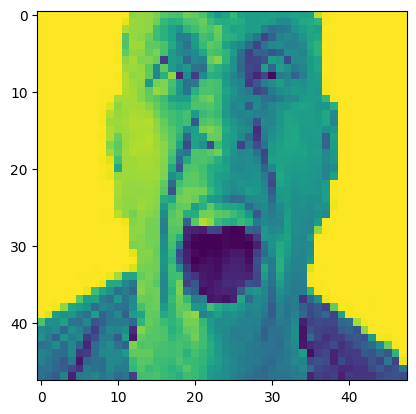

In [ ]:
import cv2
img = cv2.imread('/content/newimg.jpeg')
#image_np = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48,48))
image=np.expand_dims(img,0)
# Make a prediction on the image
prediction = model.predict(image)
# Get the class with the highest probability
class_index = np.argmax(prediction)
# Print the class with the highest probability
print('Predicted class:', labels[class_index])
plt.imshow(img)

1/1 [==============================] - 0s 41ms/step
Predicted class: surprise


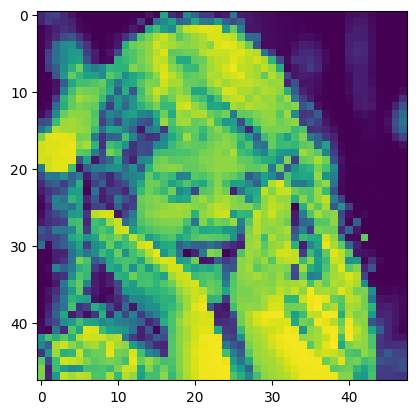

In [ ]:
img = cv2.imread('/content/newimg1.jpg')
#image_np = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48,48))
image=np.expand_dims(img,0)
# Make a prediction on the image
prediction = model.predict(image)
# Get the class with the highest probability
class_index = np.argmax(prediction)
# Print the class with the highest probability
print('Predicted class:', labels[class_index])
plt.imshow(img)

1/1 [==============================] - 0s 25ms/step


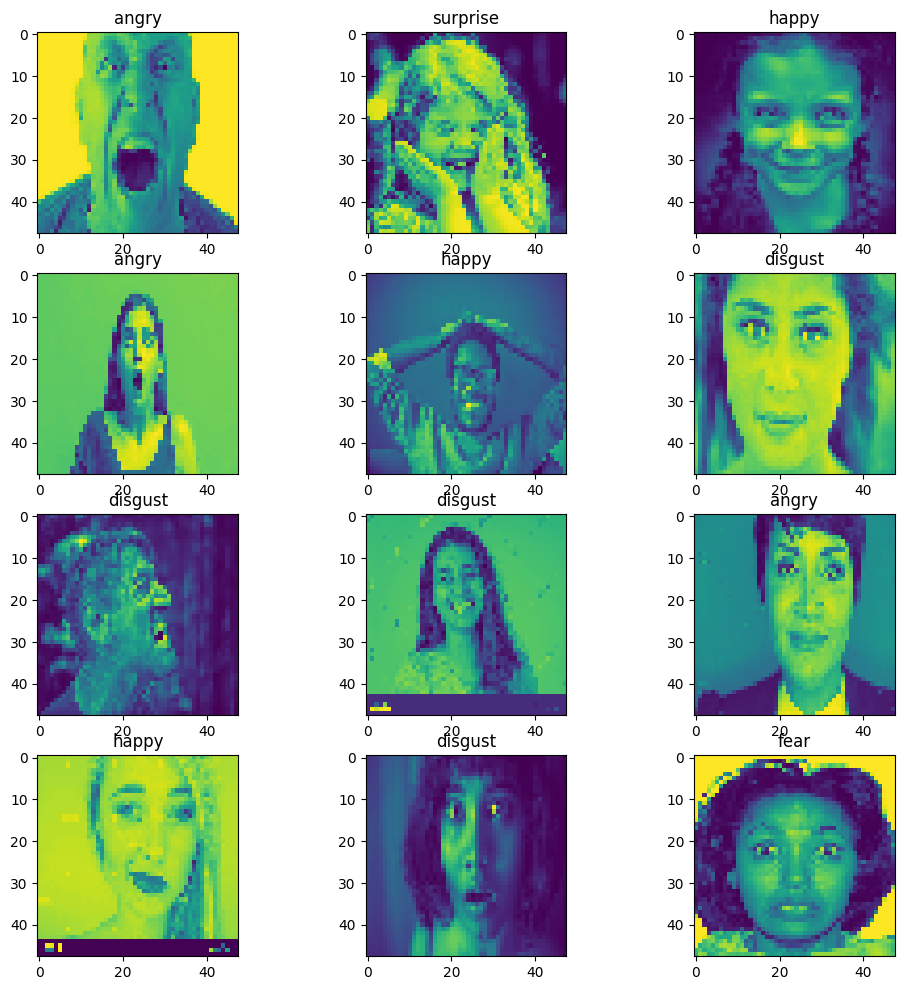

In [ ]:
fp='/content/drive/MyDrive/testImg'
plt.figure(figsize= (12,12))
x=1
for i in os.listdir(fp):
    imgpath = os.path.join(fp,i)
    img = cv2.imread(imgpath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(48,48))
    image=np.expand_dims(img,0)
    # Make a prediction on the image
    prediction = model.predict(image)
    # Get the class with the highest probability
    class_index = np.argmax(prediction)
    # Print the class with the highest probability
    #print('Predicted class:', labels[class_index])
    plt.subplot(4,3,x)
    x+=1
    plt.title(labels[class_index])
    plt.imshow(img)

1/1 [==============================] - 0s 94ms/step
Predicted class: happy


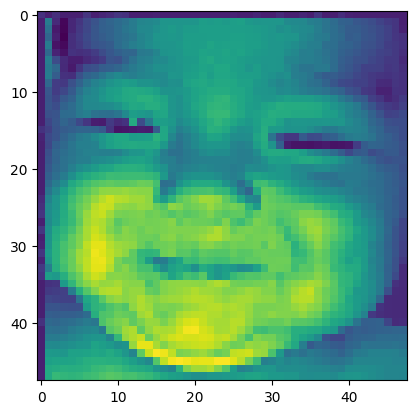

In [ ]:
img = cv2.imread('/content/f.png')
#image_np = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48,48))
image=np.expand_dims(img,0)
# Make a prediction on the image
prediction = model.predict(image)
# Get the class with the highest probability
class_index = np.argmax(prediction)
# Print the class with the highest probability
print('Predicted class:', labels[class_index])
plt.imshow(img)